In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable

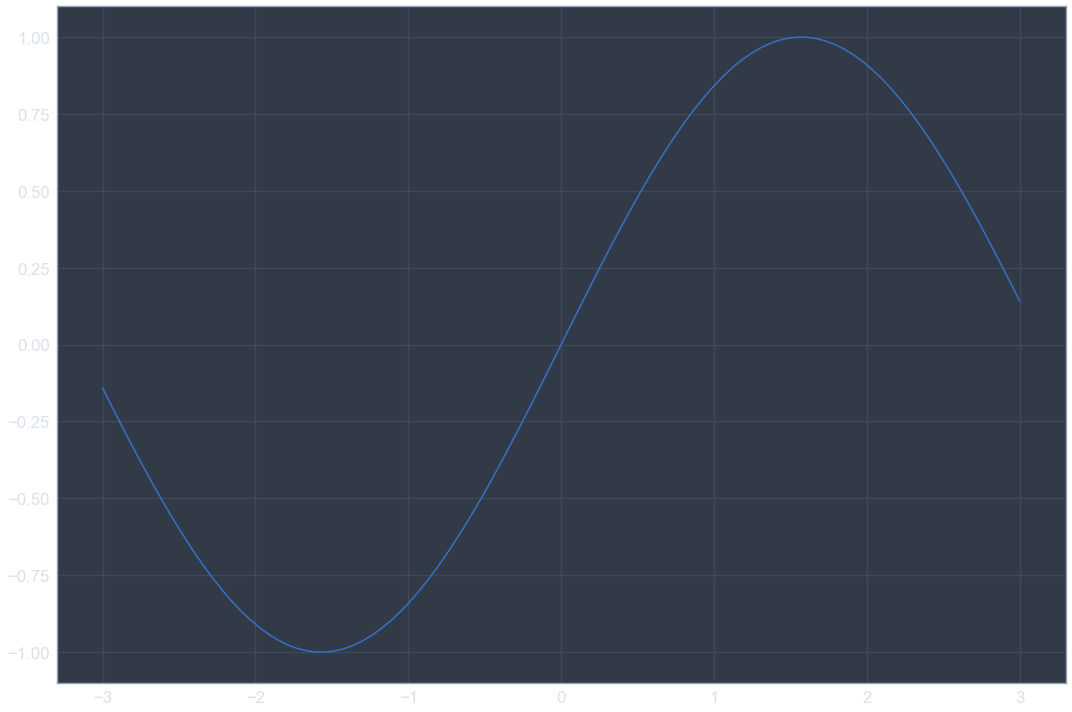

In [4]:
x = np.linspace(-3, 3, 100).reshape((100, 1))
y = sin(x)
plot(x, y)

In [44]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1=nn.Linear(1,10)
        self.fc2=nn.Linear(10,5)
        self.fc3=nn.Linear(5,1)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return F.tanh(self.fc3(x))
model = Net()
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

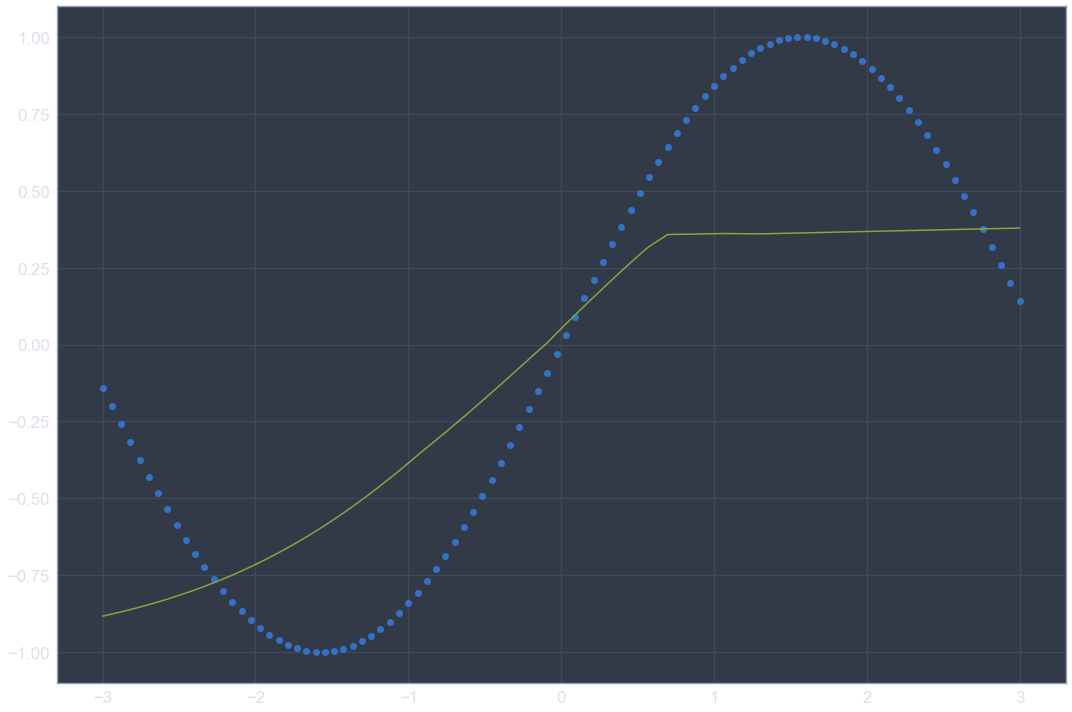

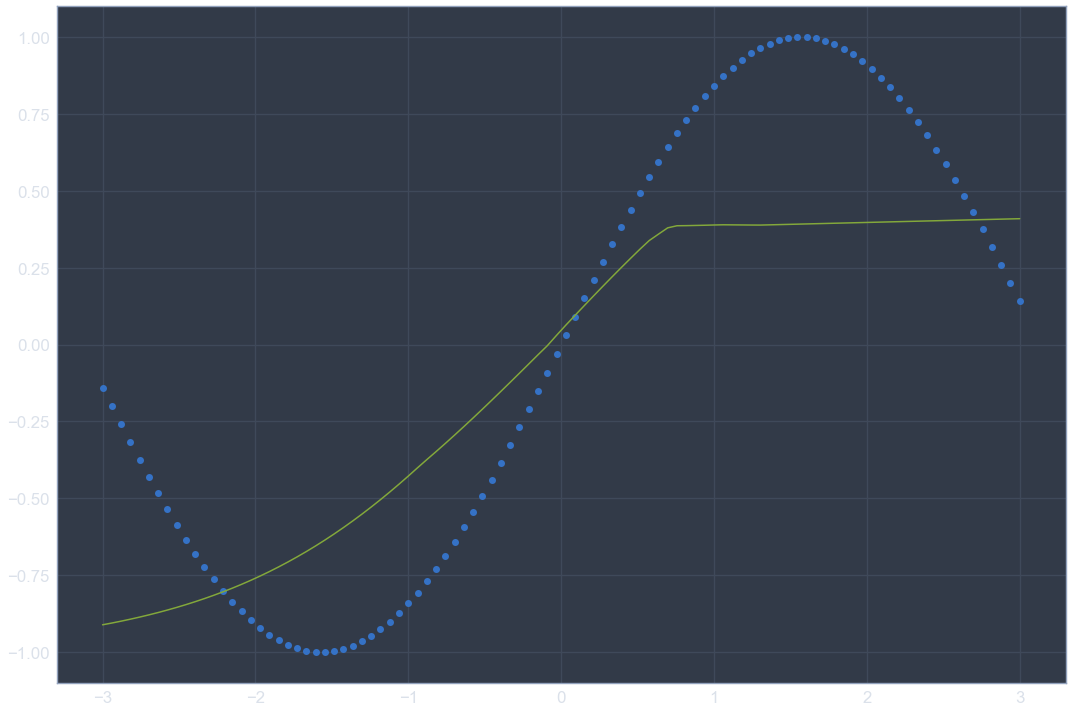

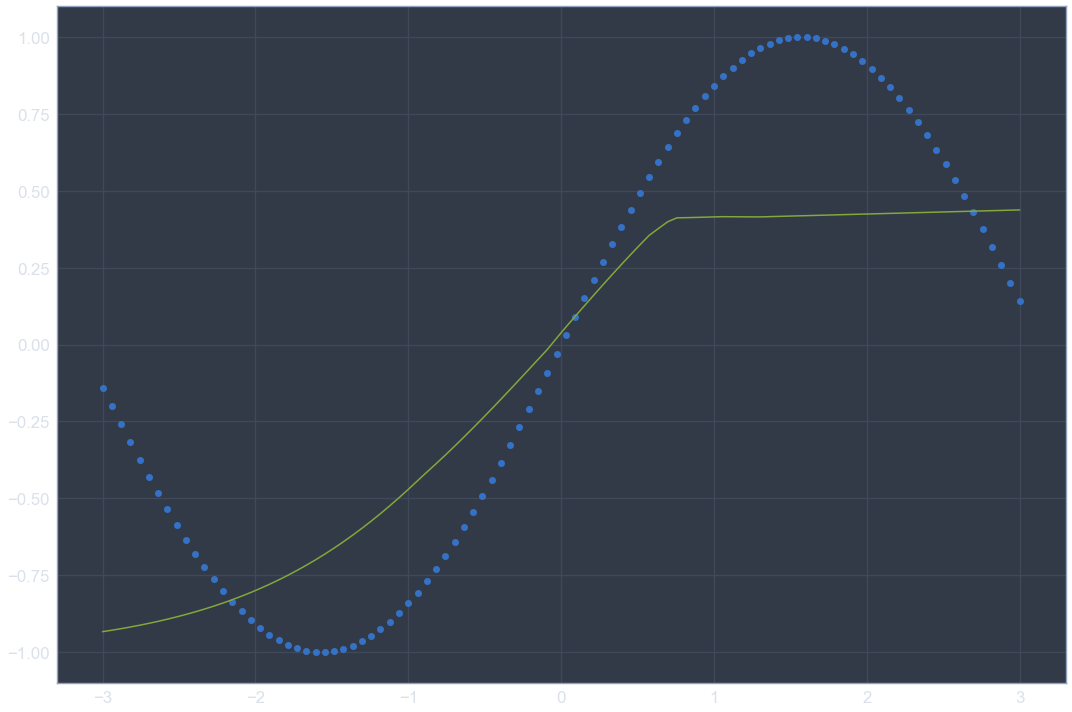

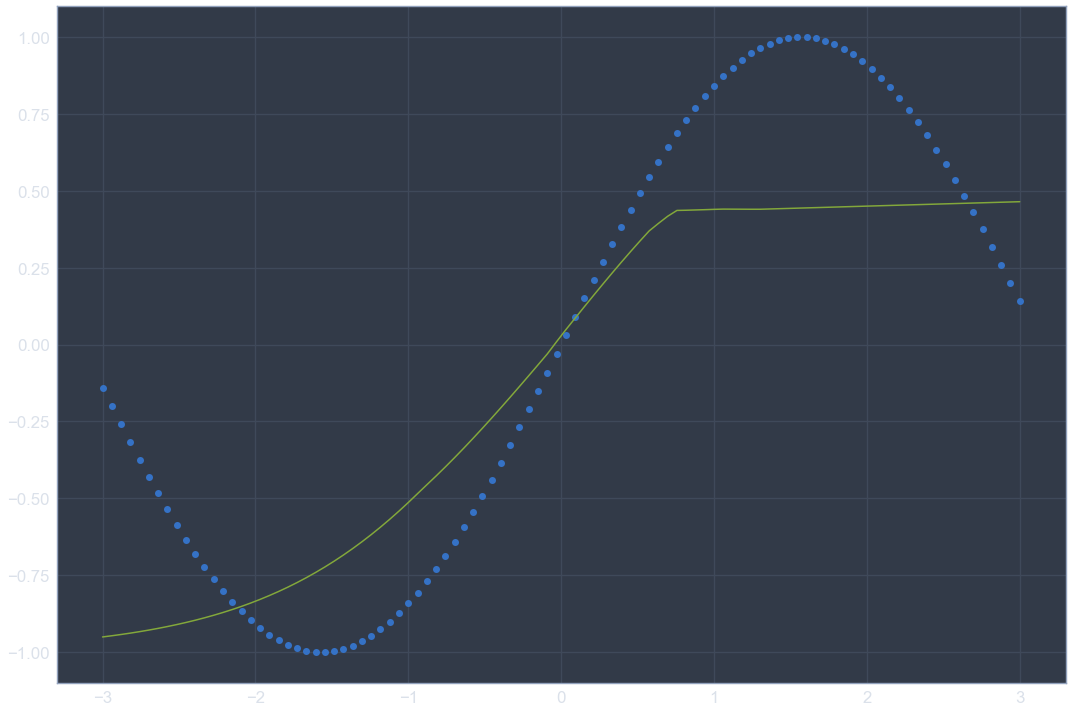

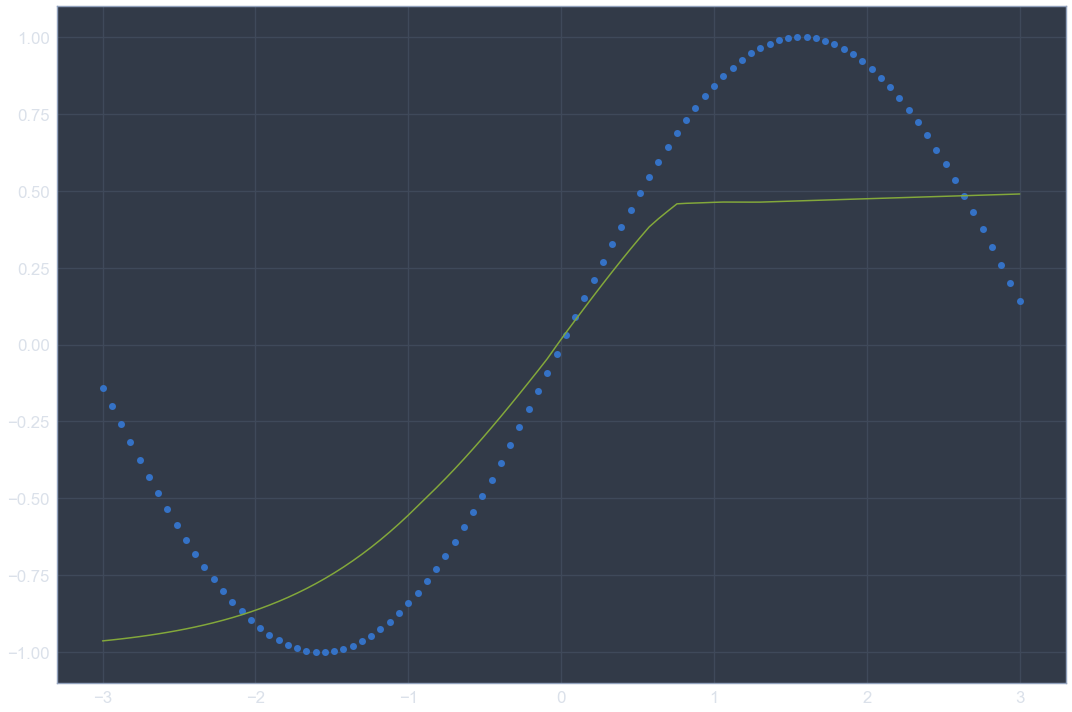

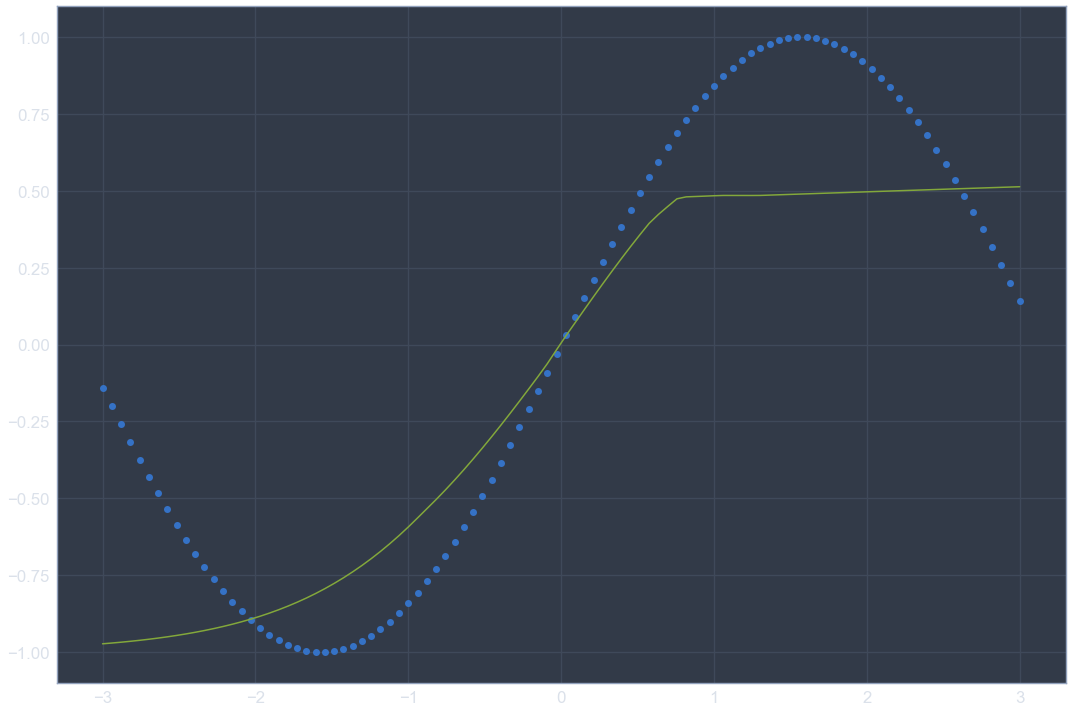

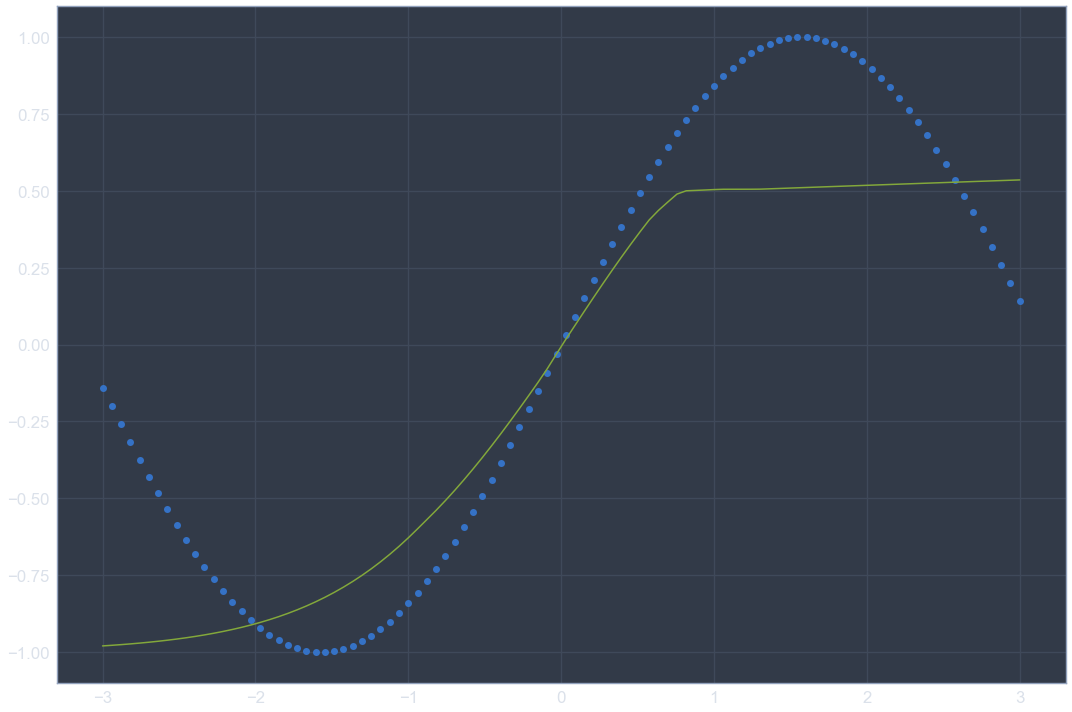

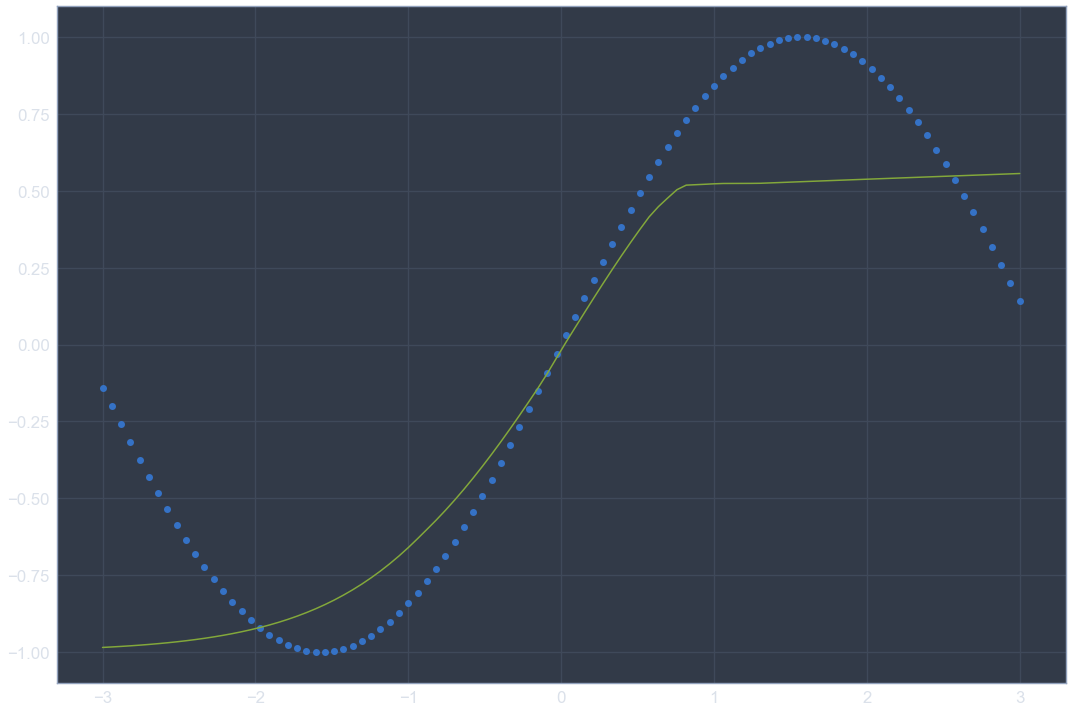

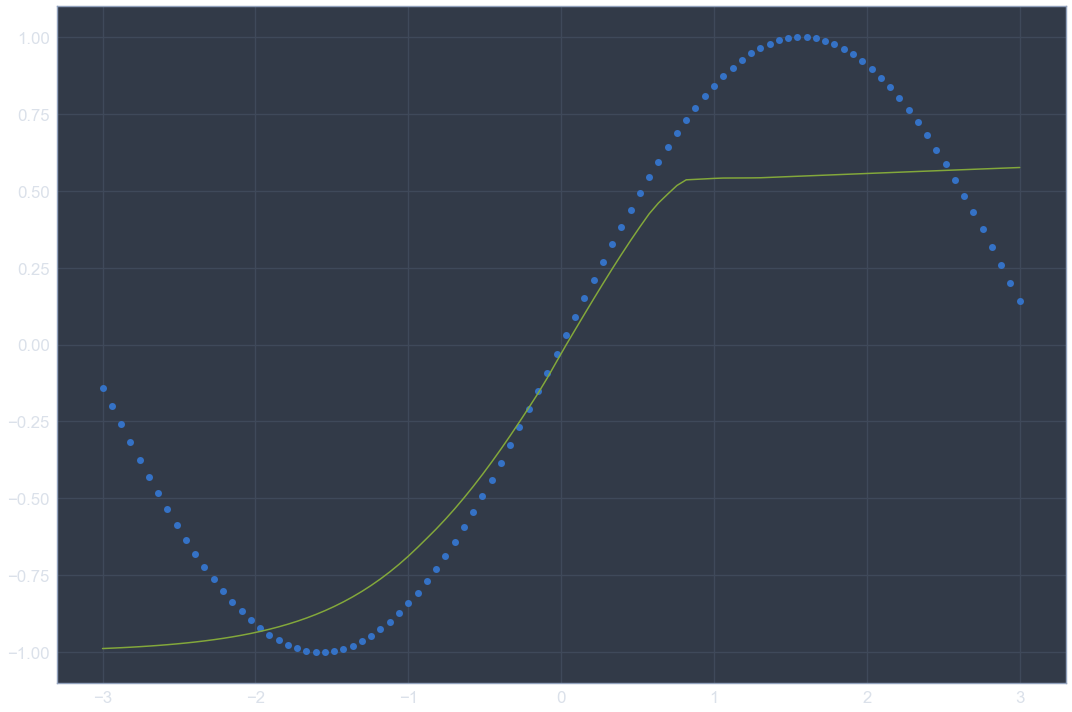

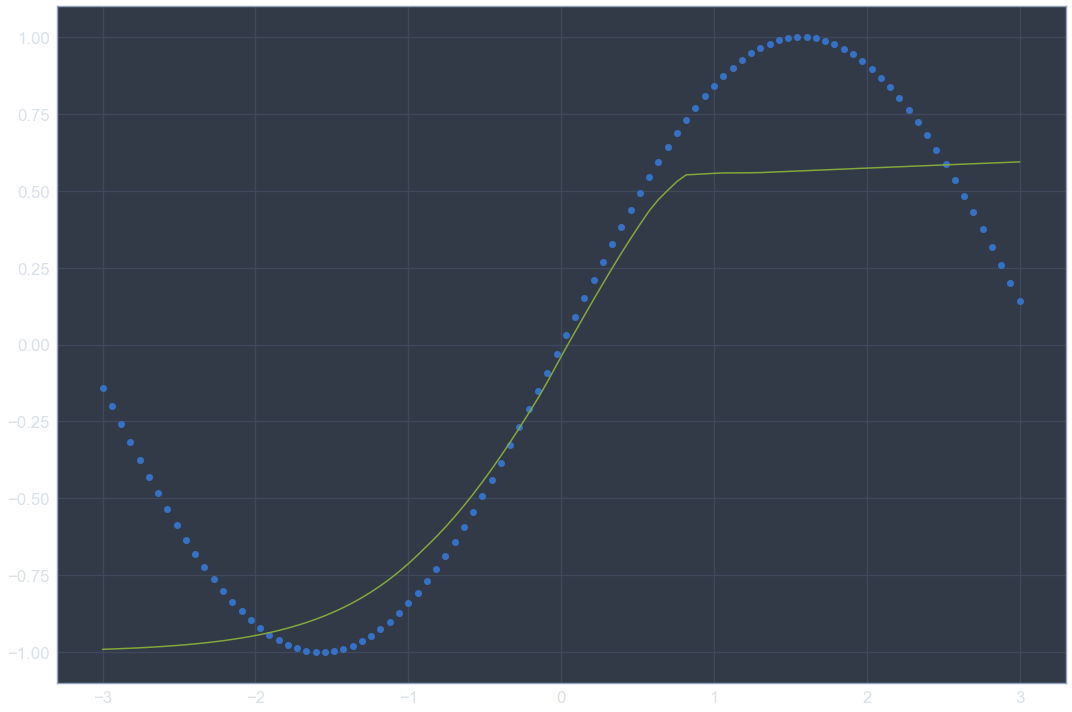

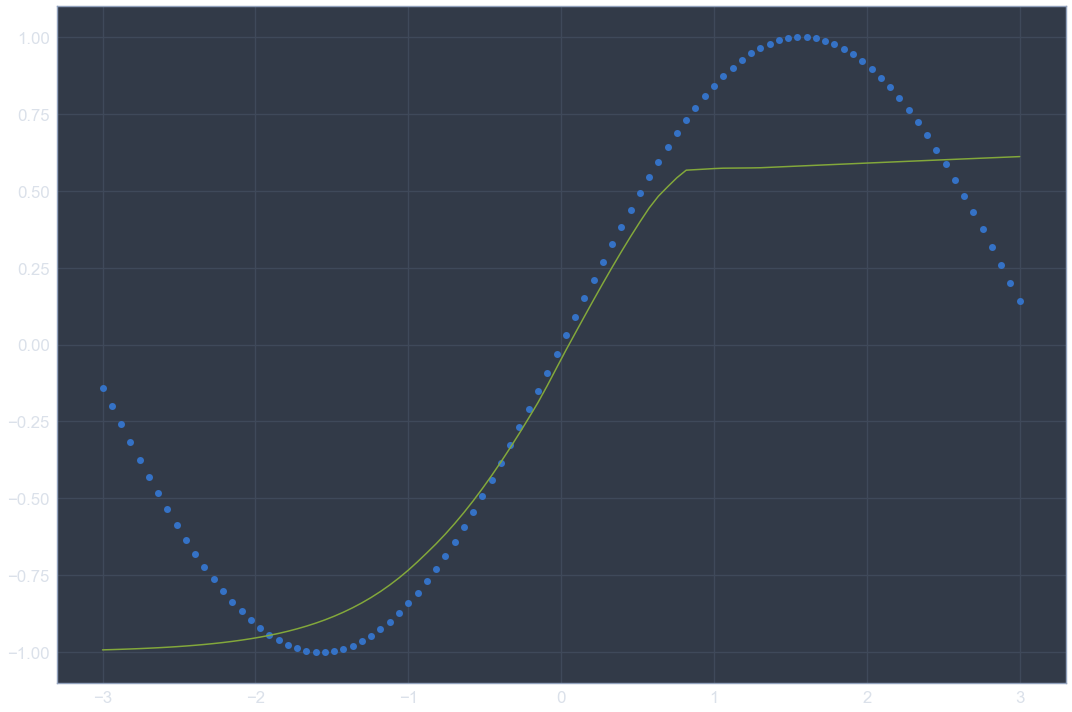

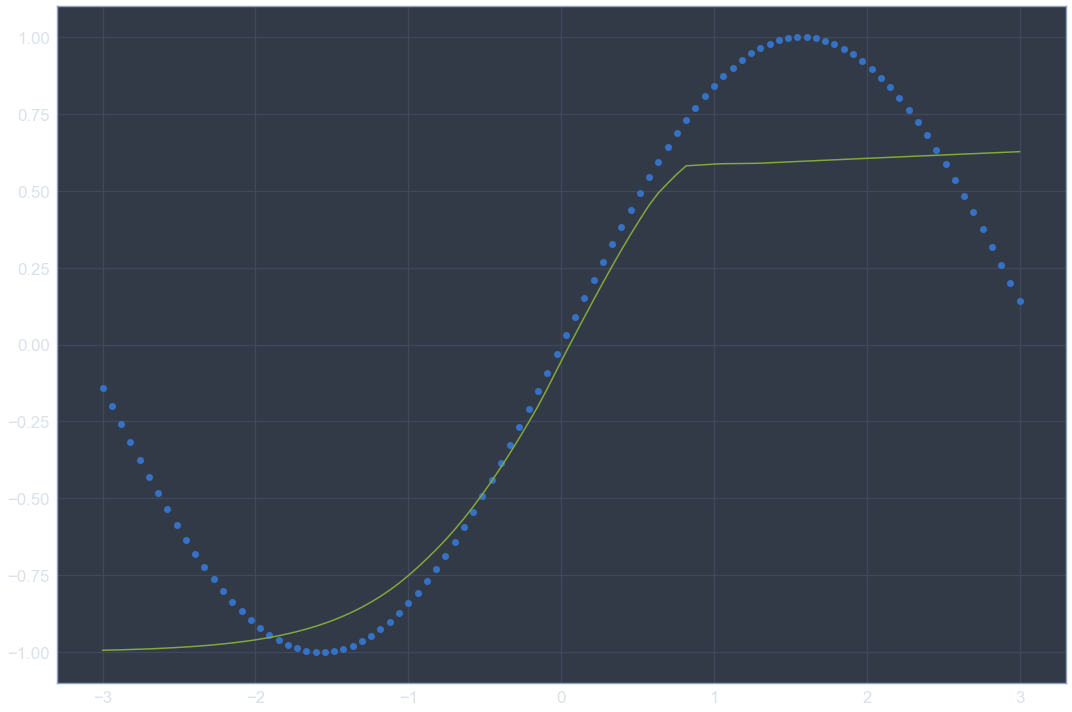

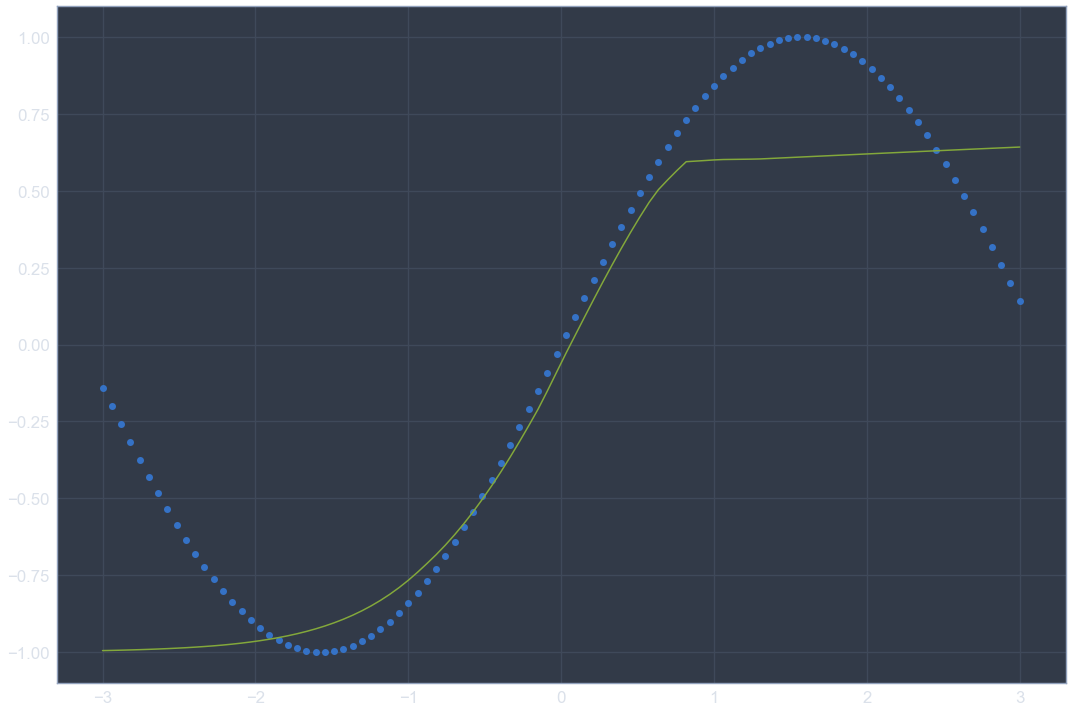

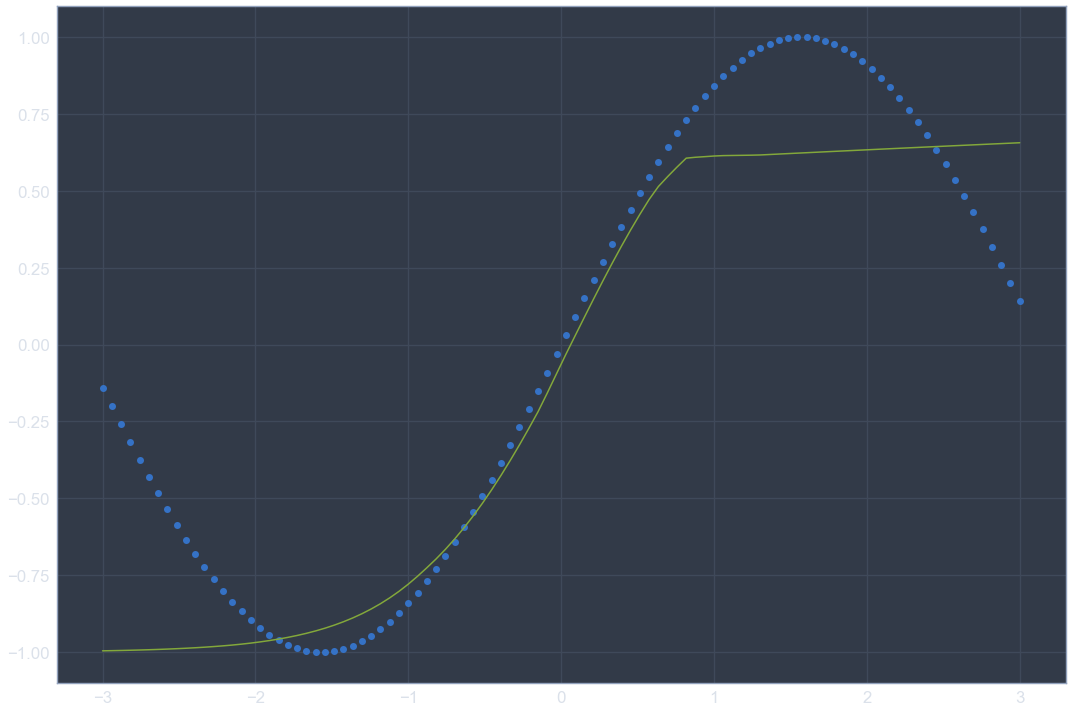

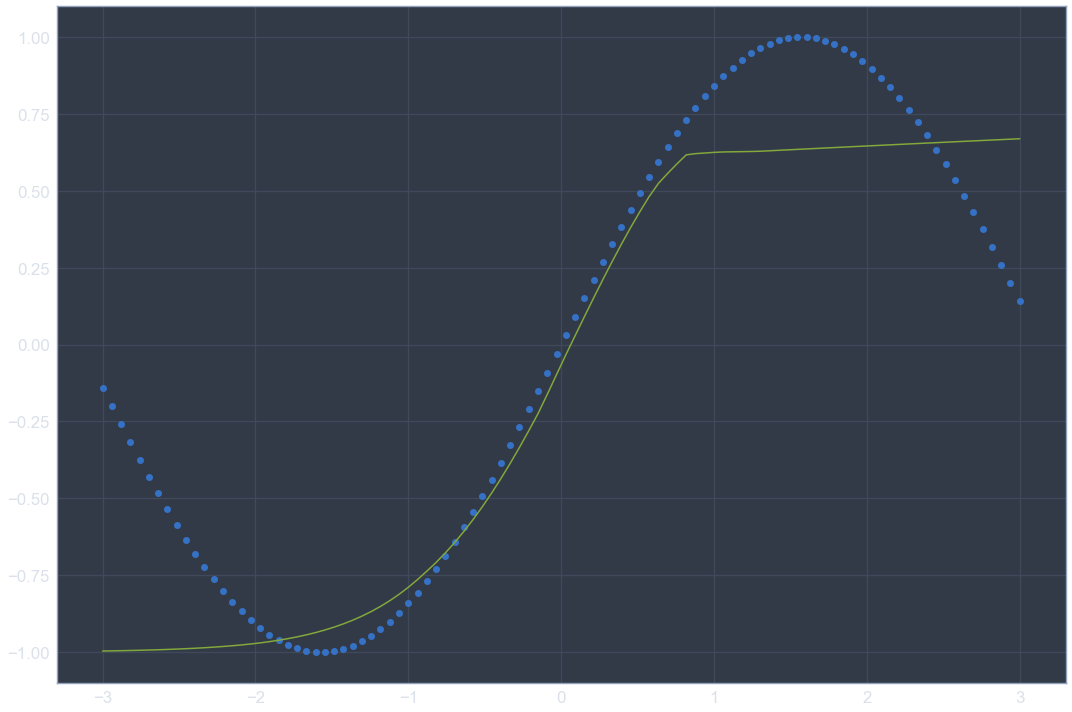

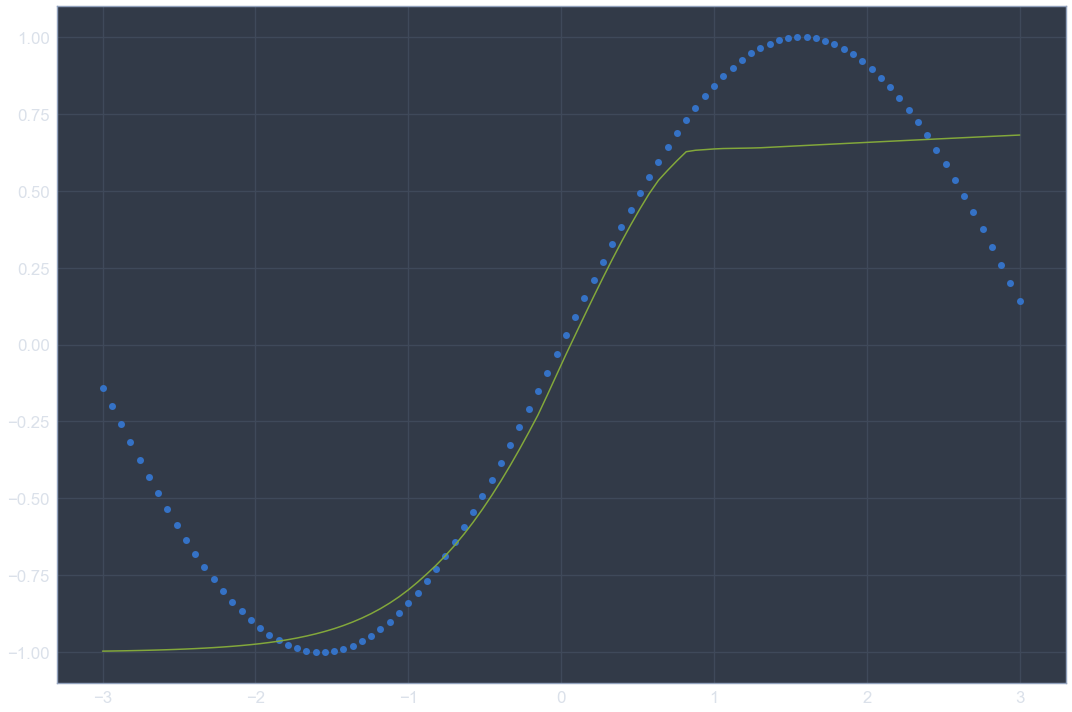

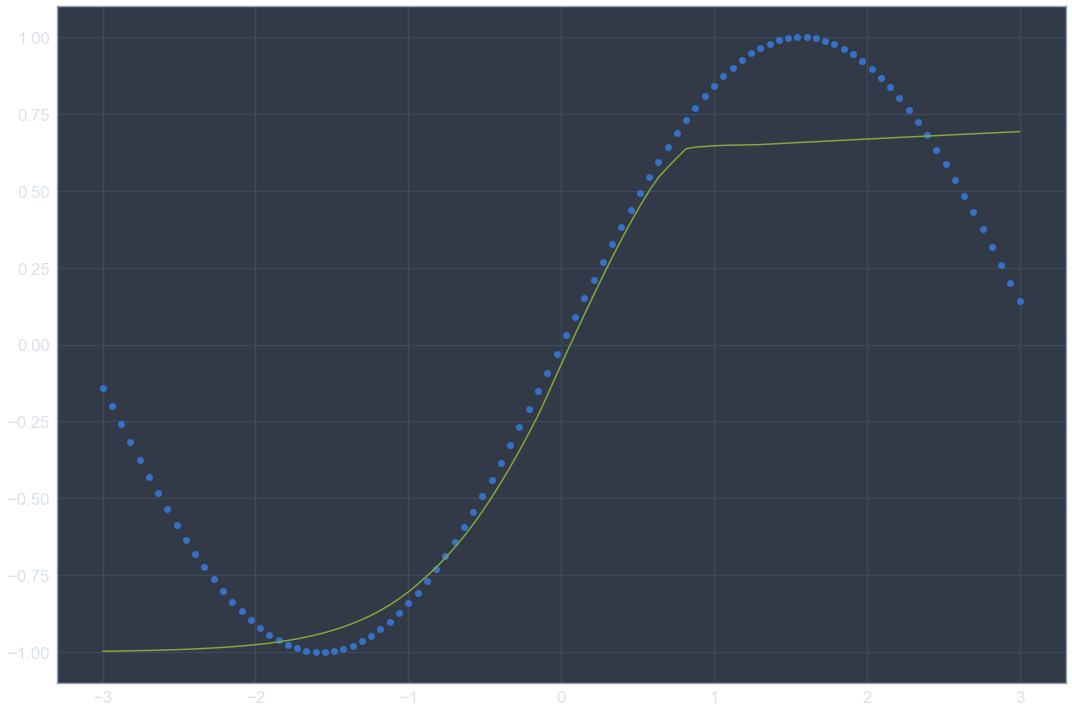

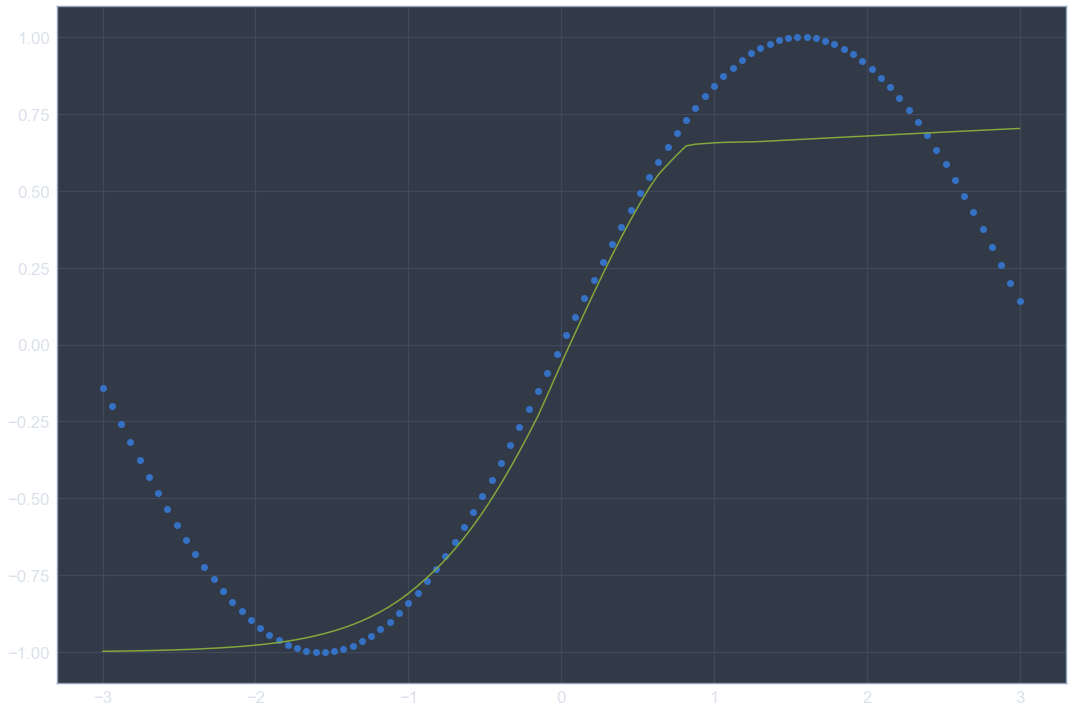

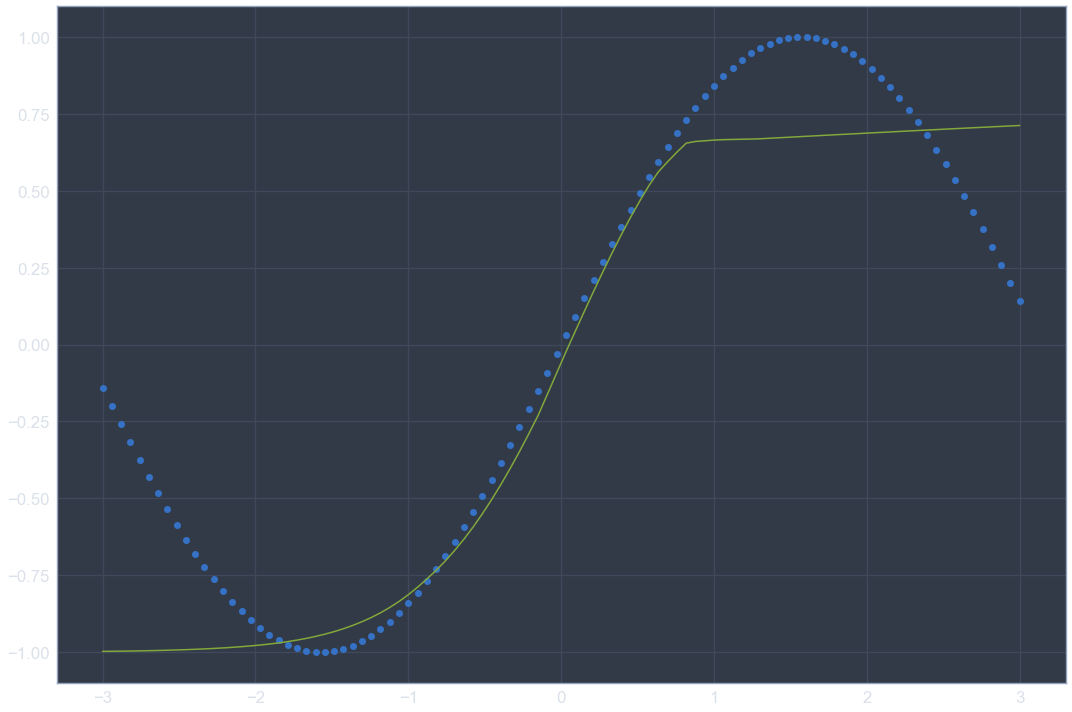

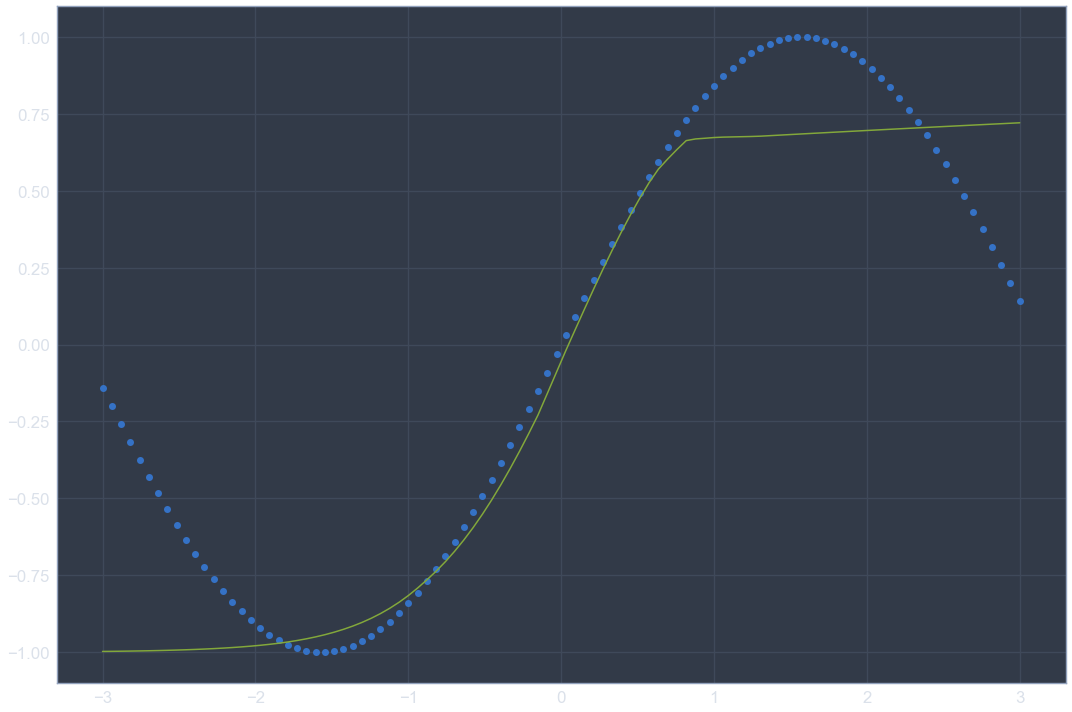

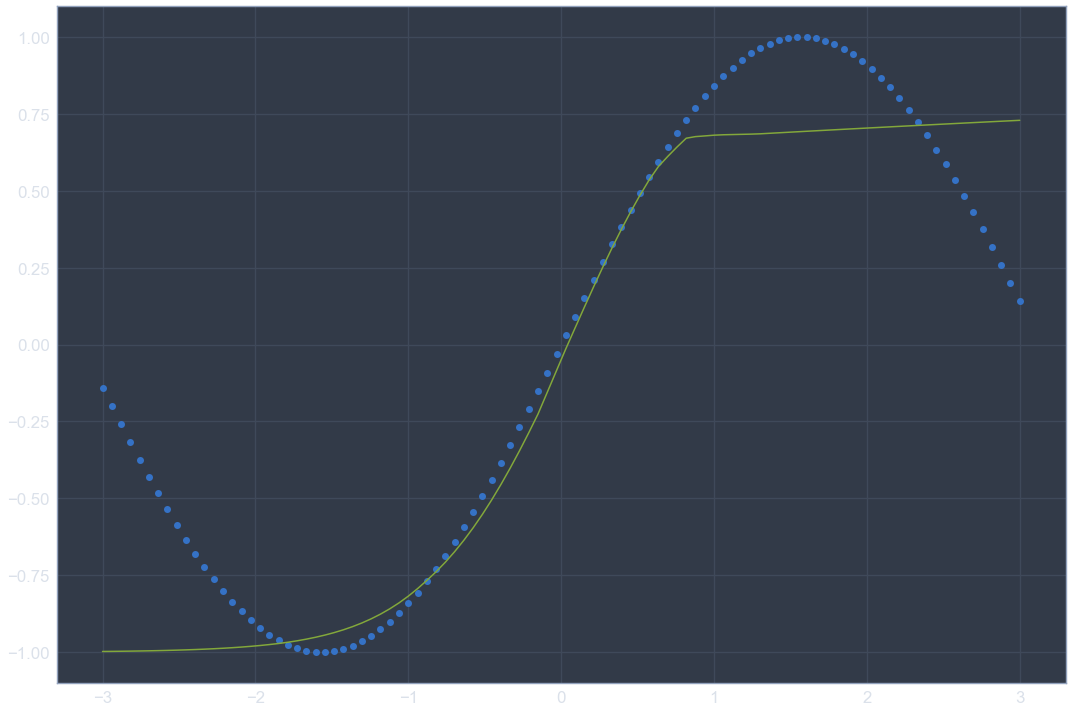

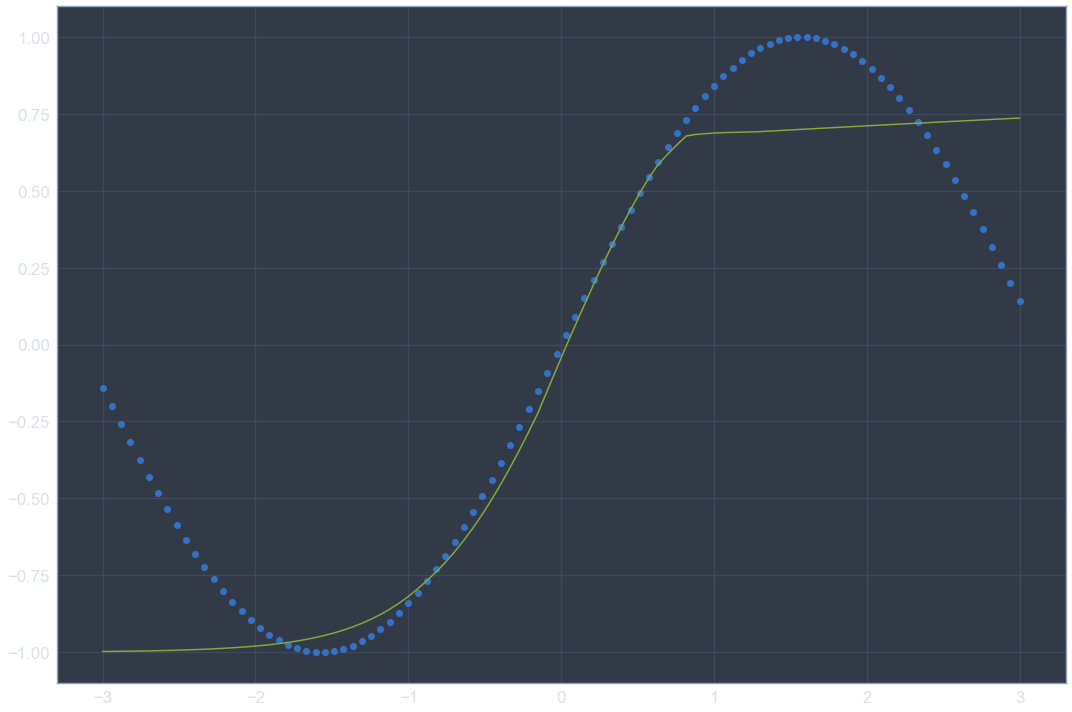

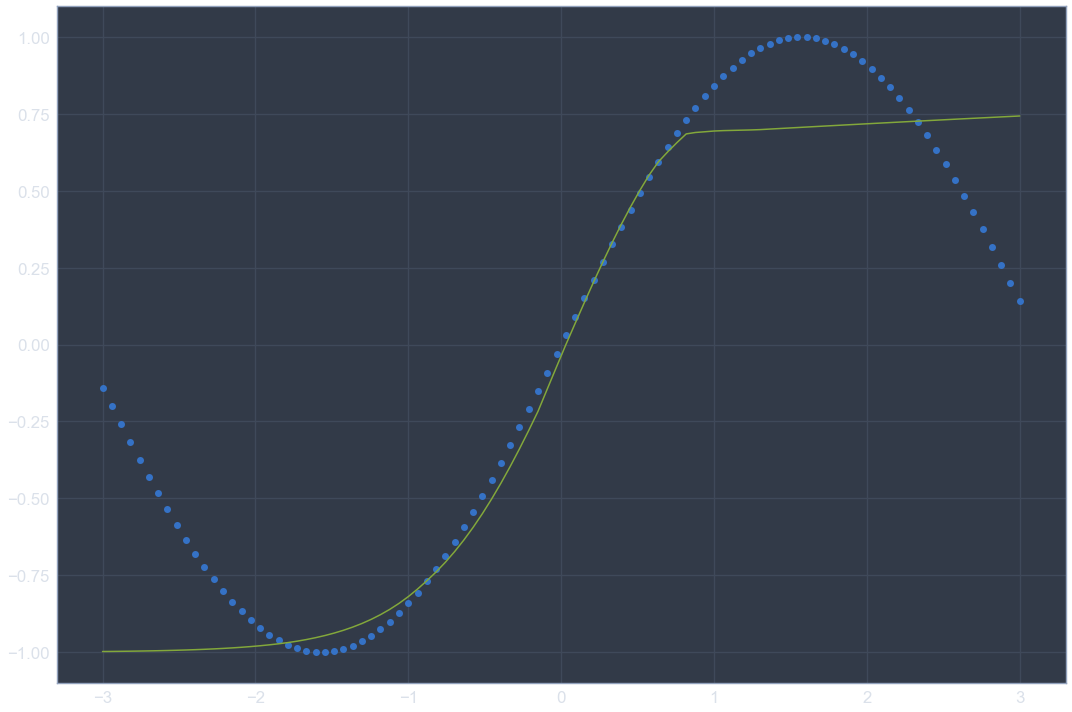

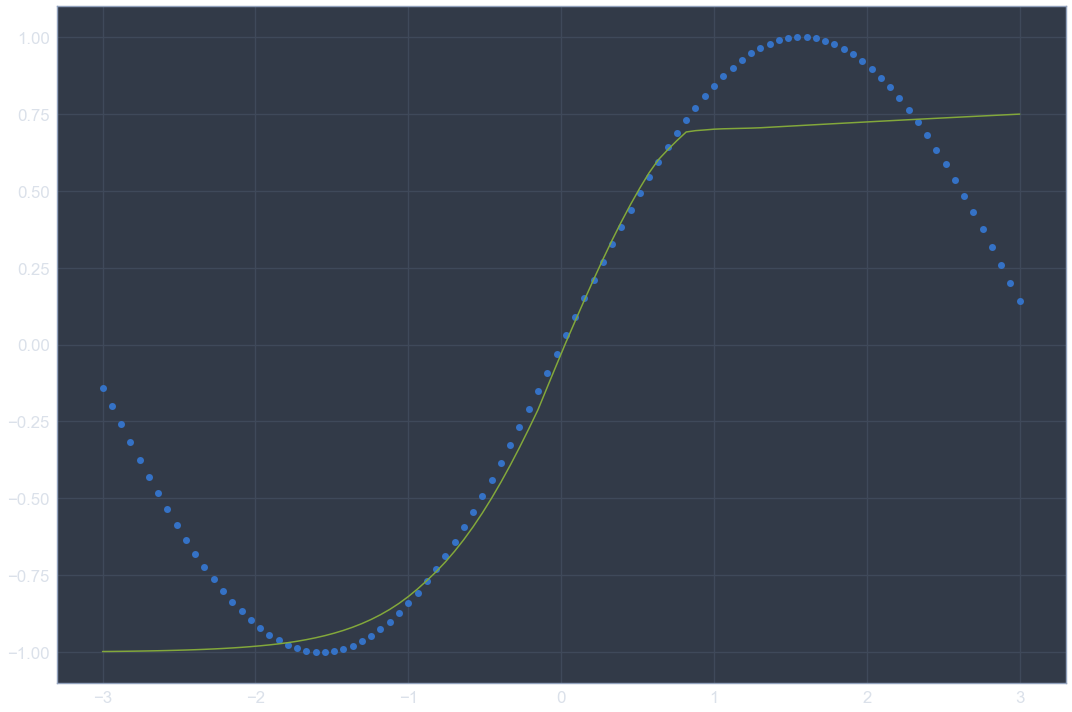

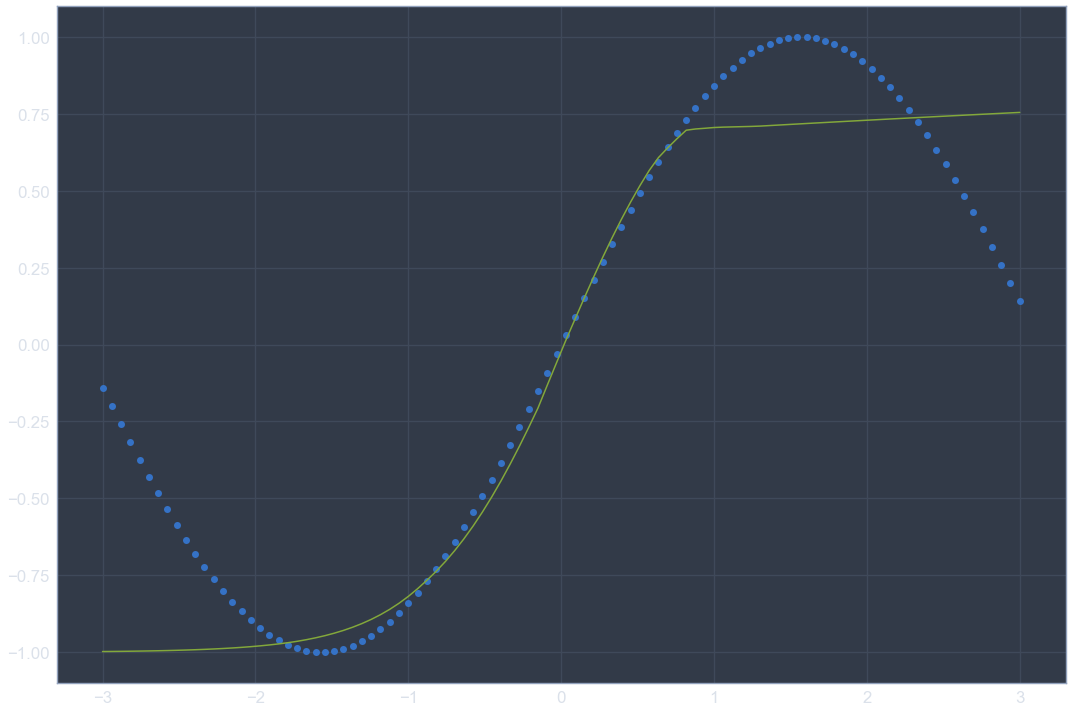

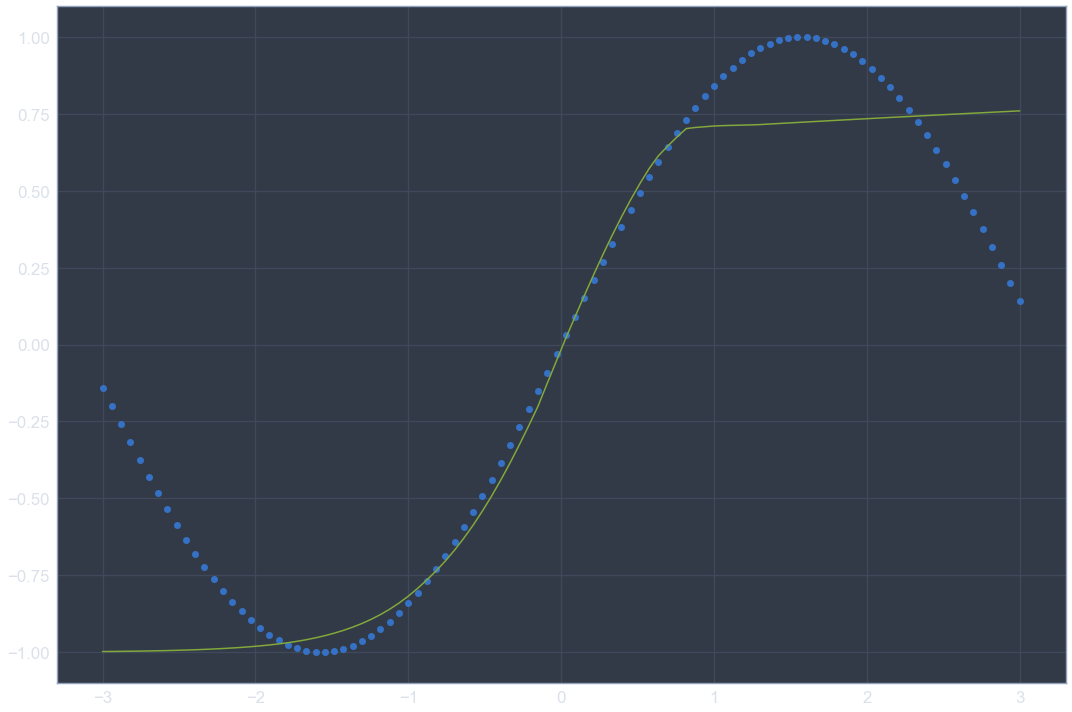

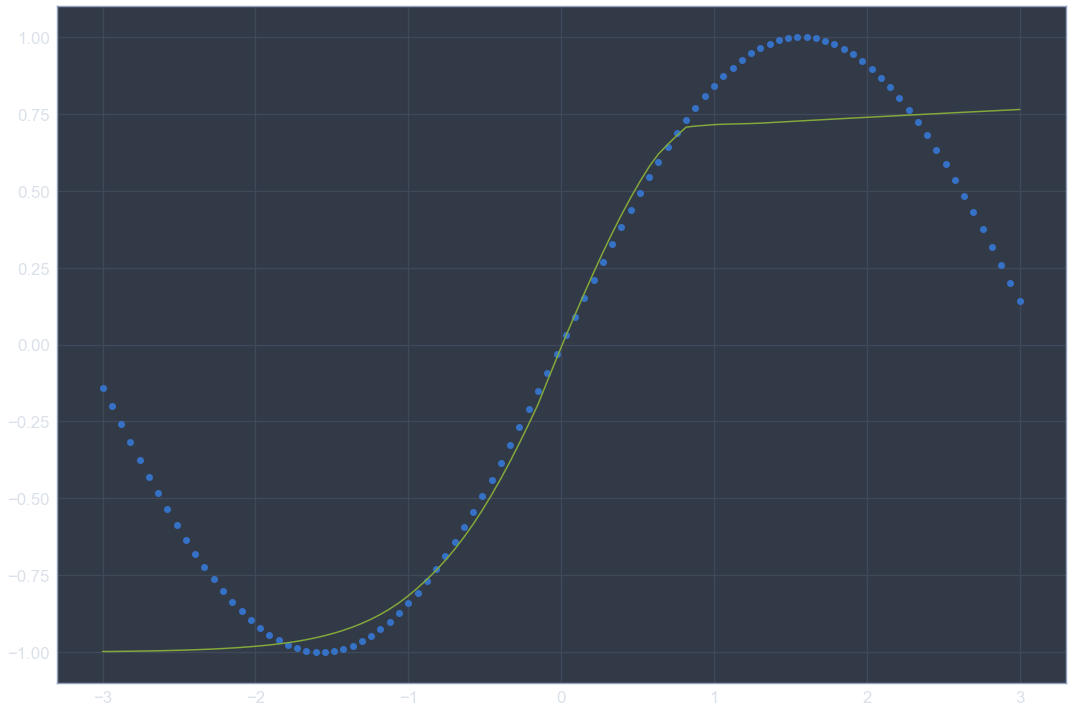

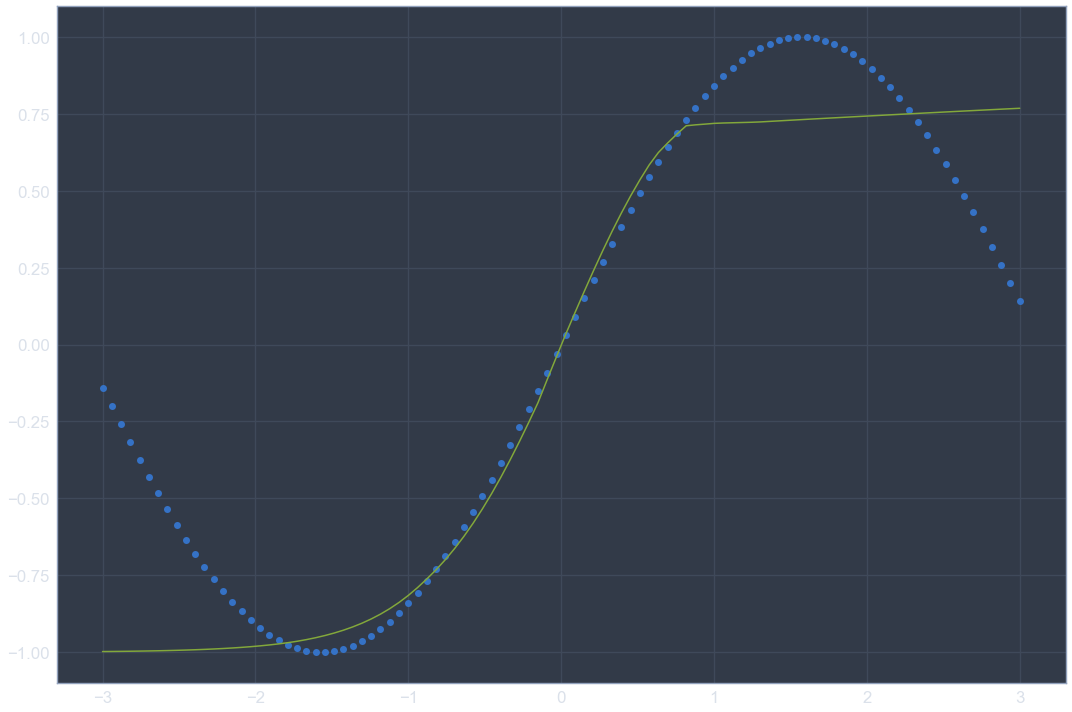

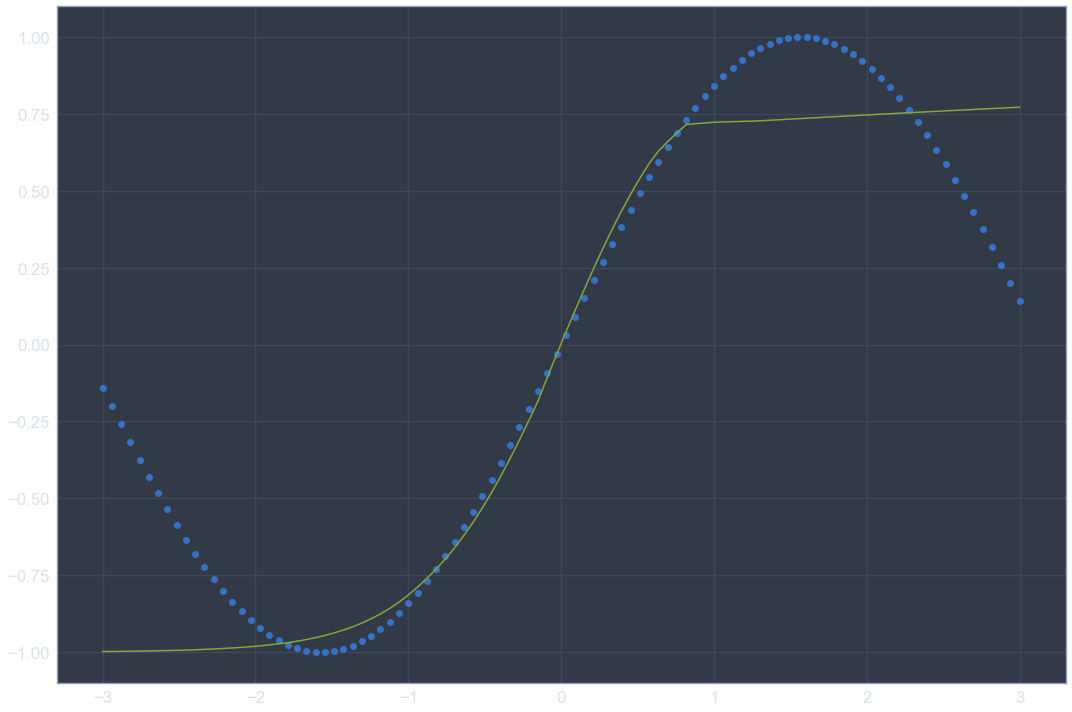

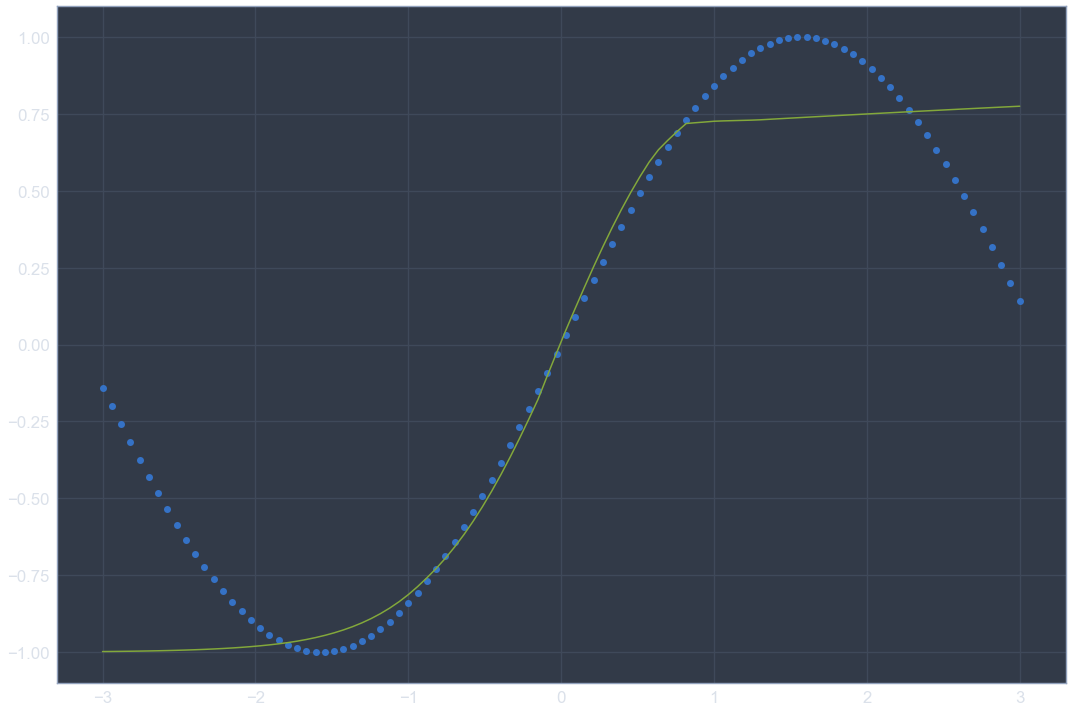

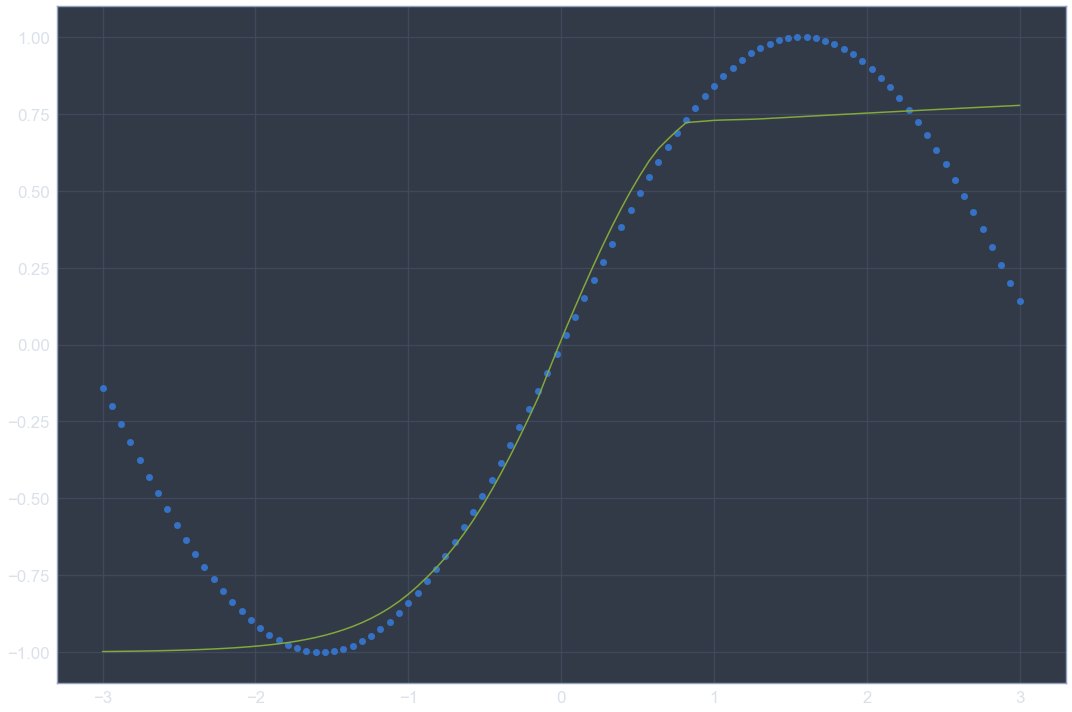

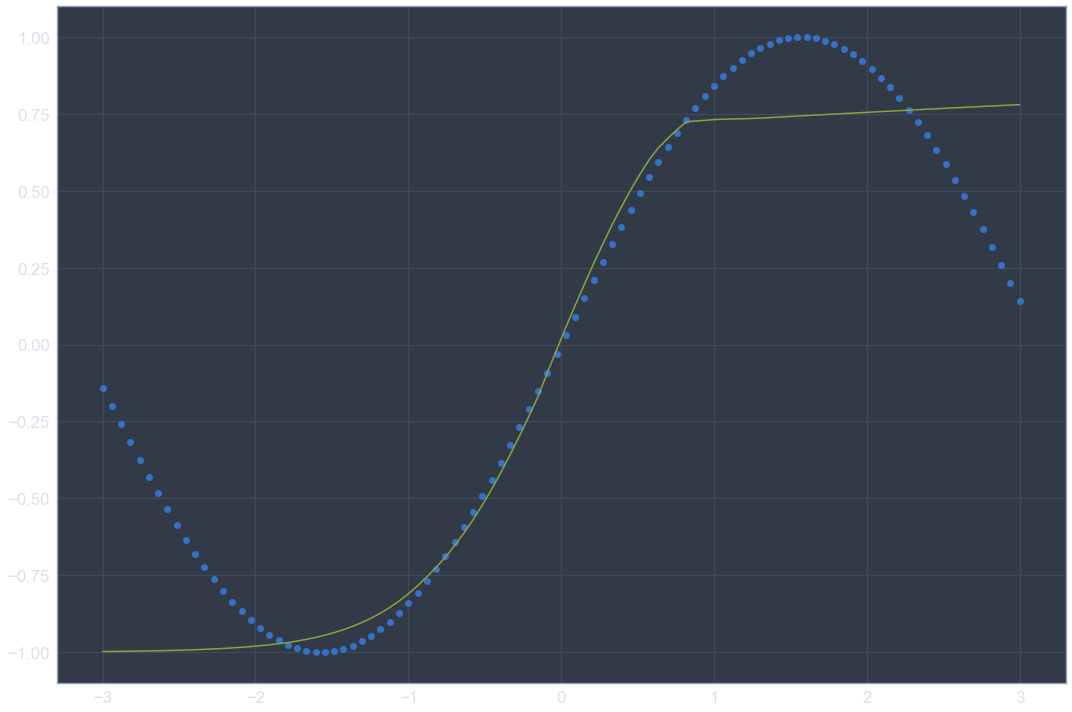

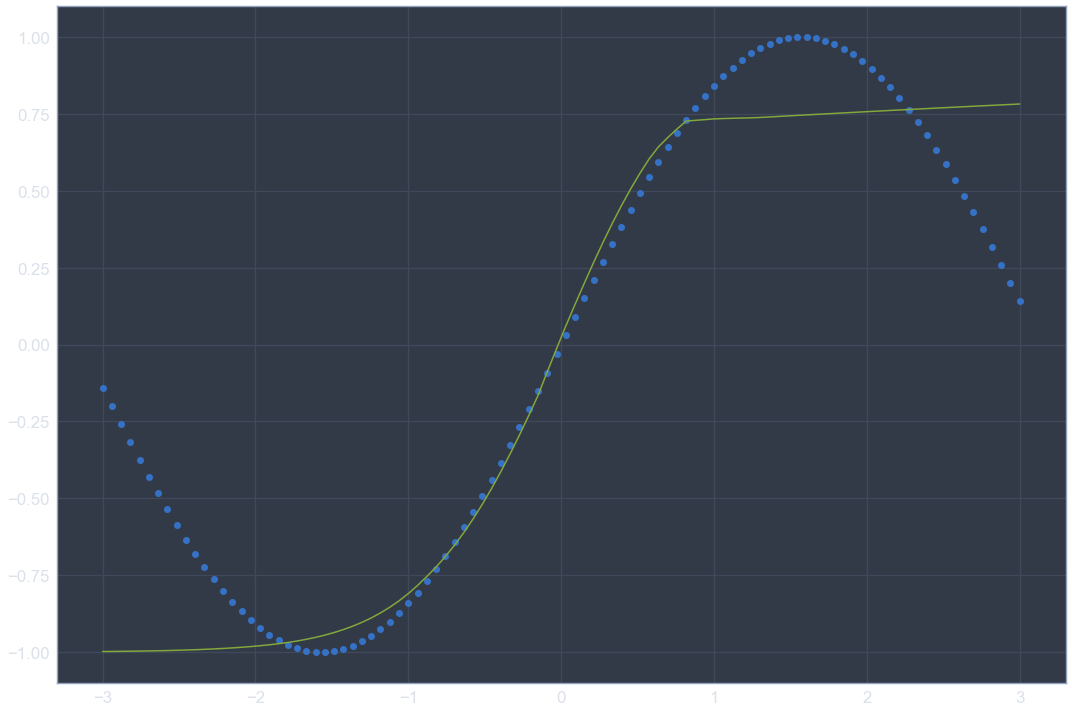

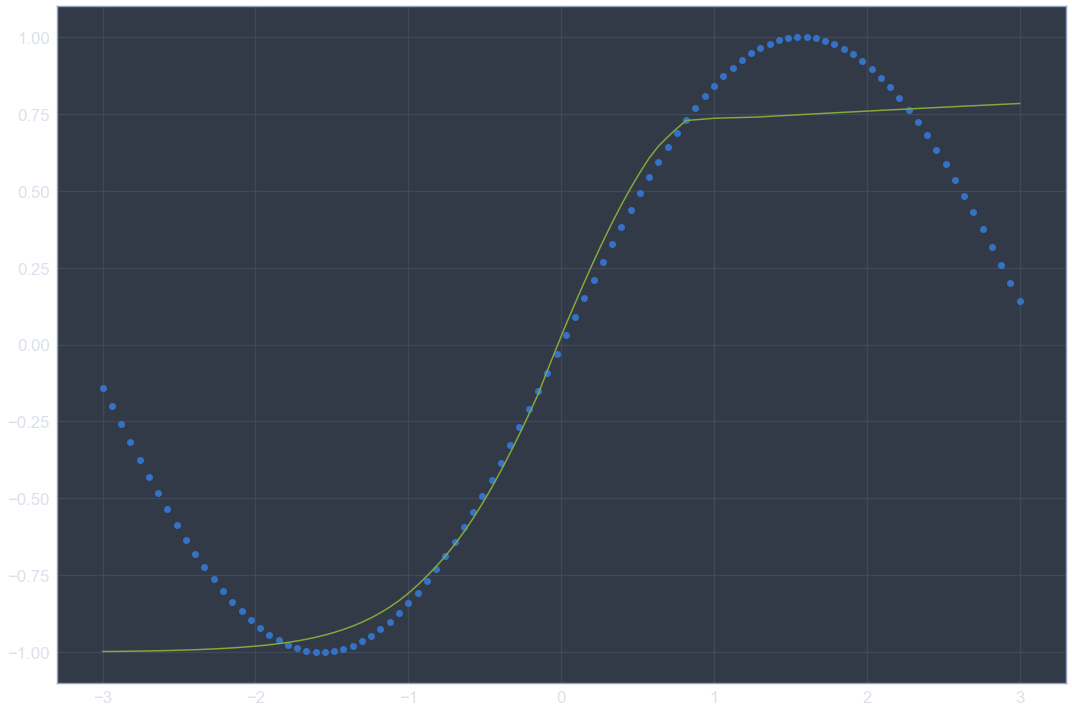

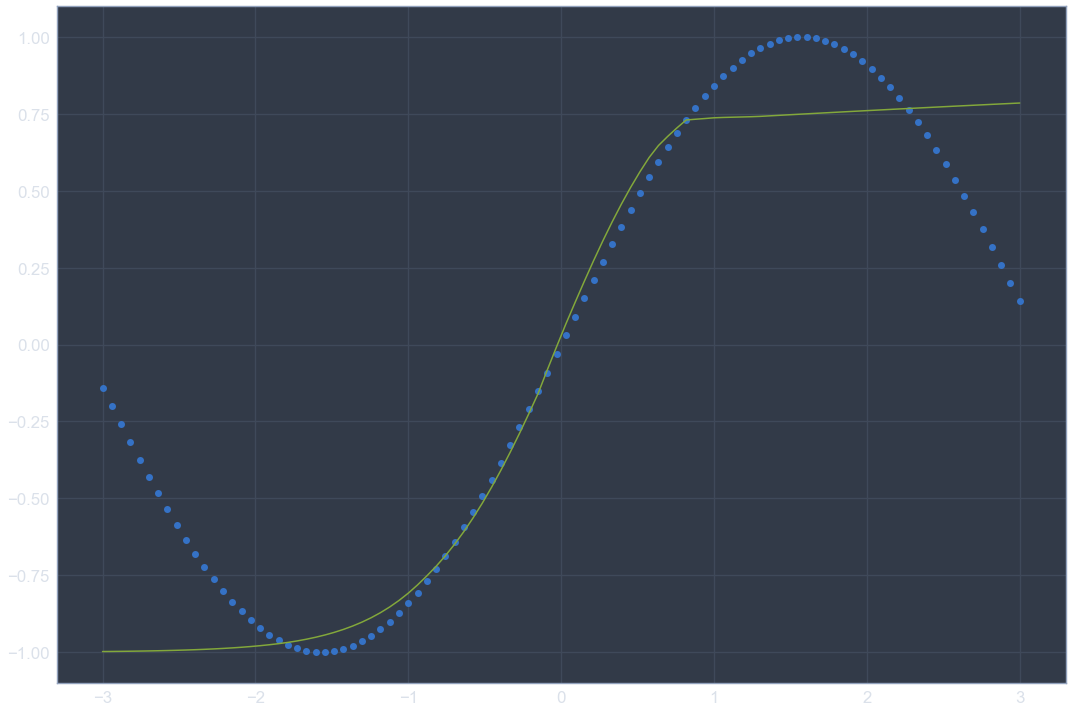

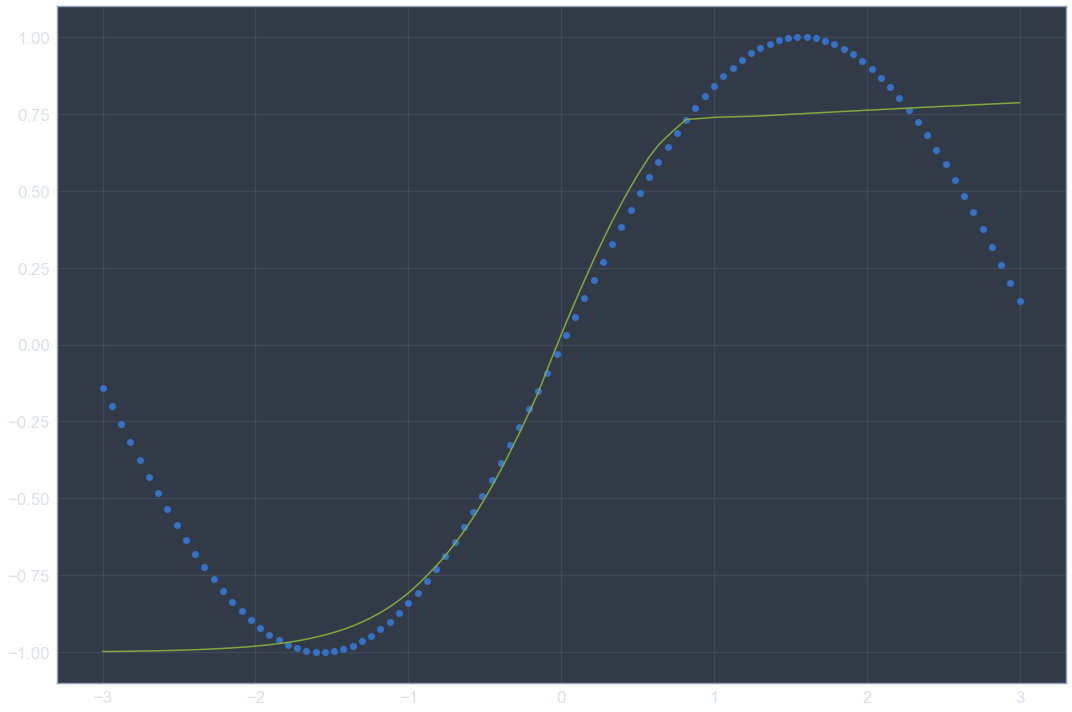

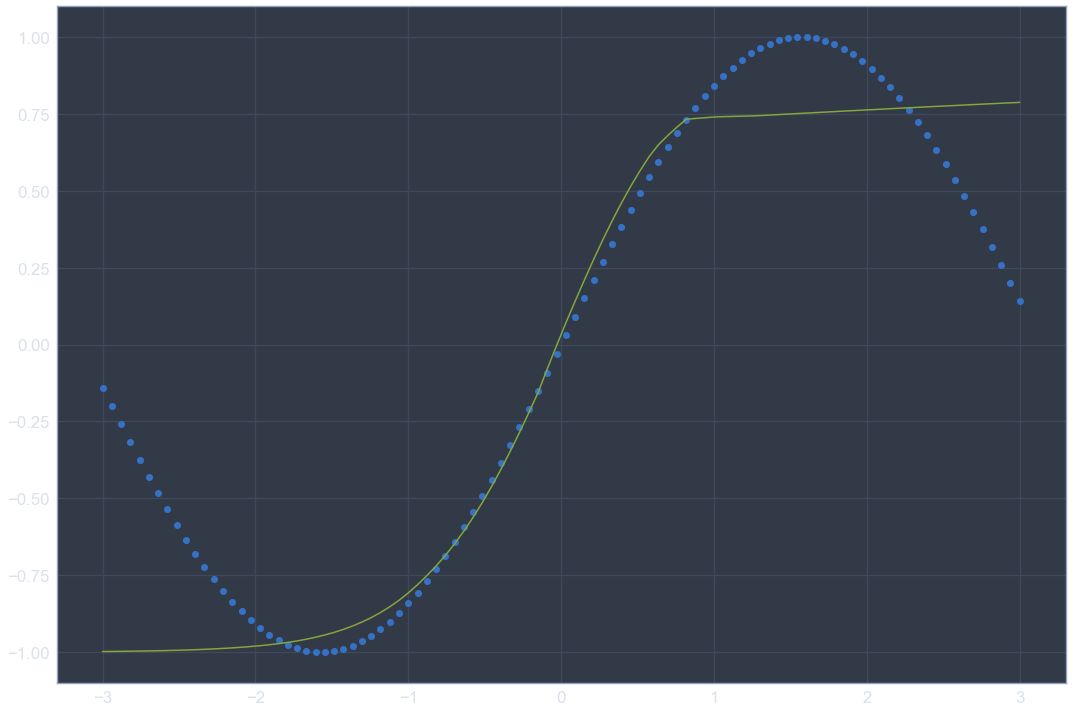

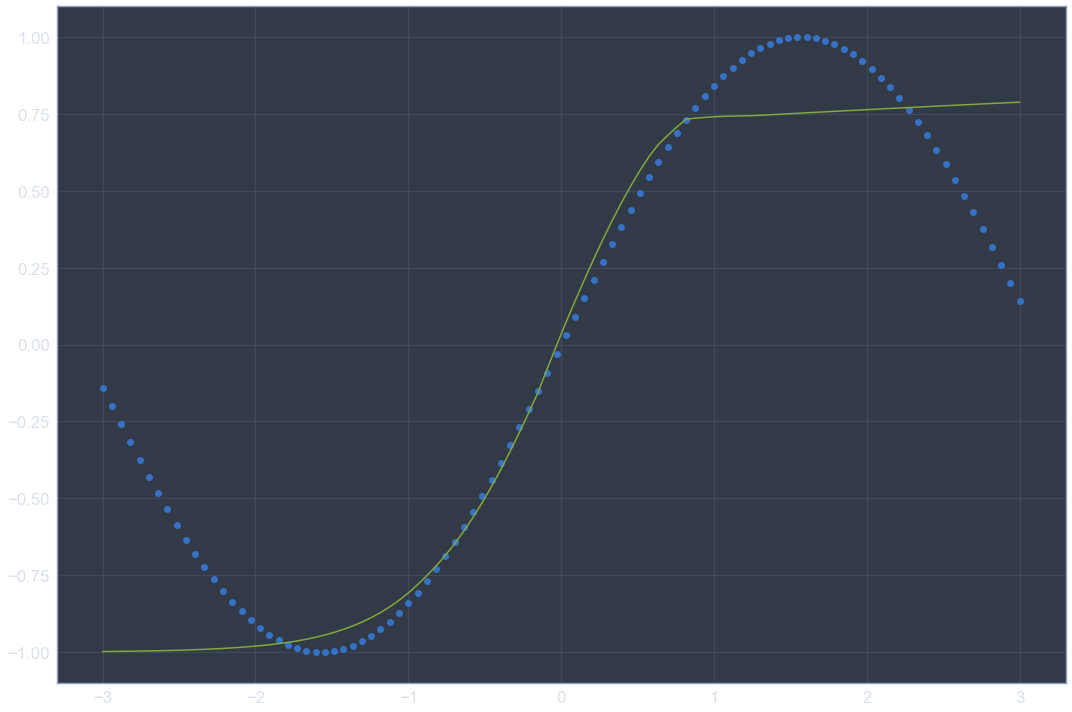

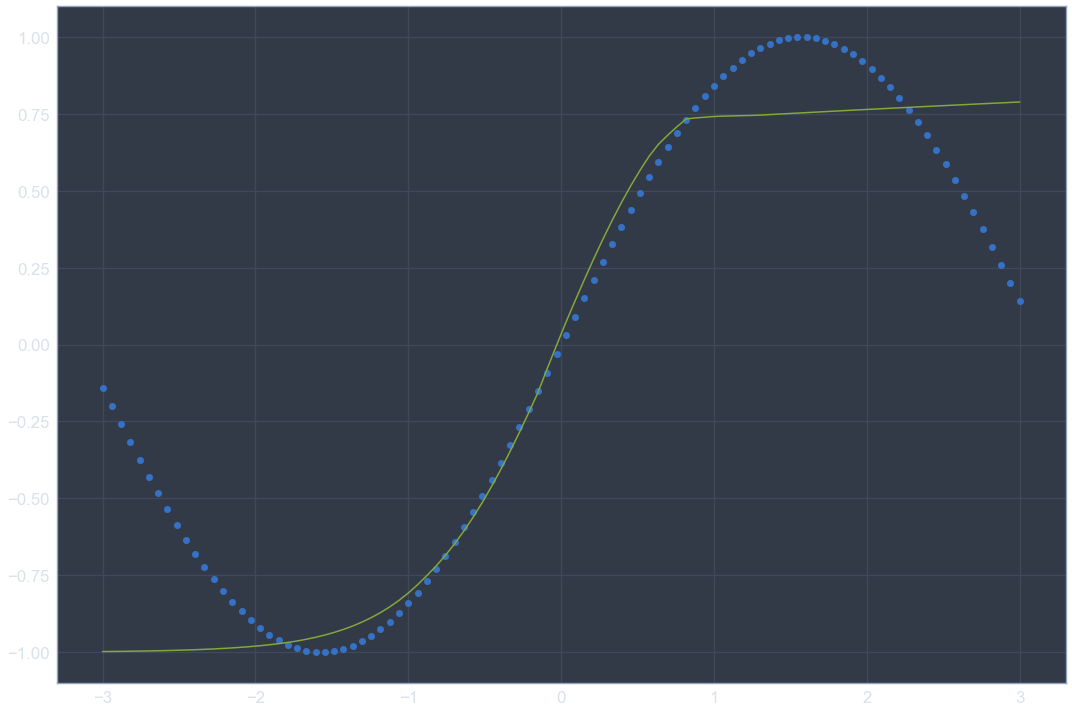

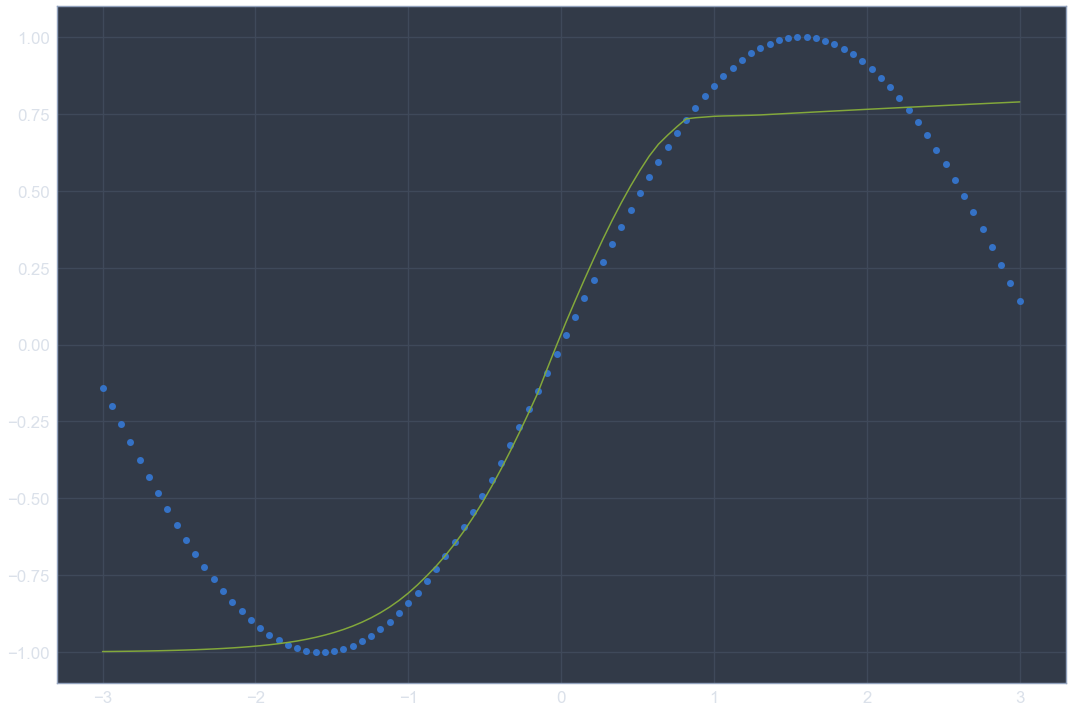

In [47]:
loss_list = []
for _ in range(40):
    output = model(Variable(torch.from_numpy(x.astype('float32'))))
    optimizer.zero_grad()
    
    l = loss(output, Variable(torch.from_numpy(y.astype('float32'))))
    l.backward()
    optimizer.step()
    
    loss_list.append(l.data.numpy())
    plot(x, y, 'o')
    plot(x, output.data.numpy()[:,0])
    plt.show()

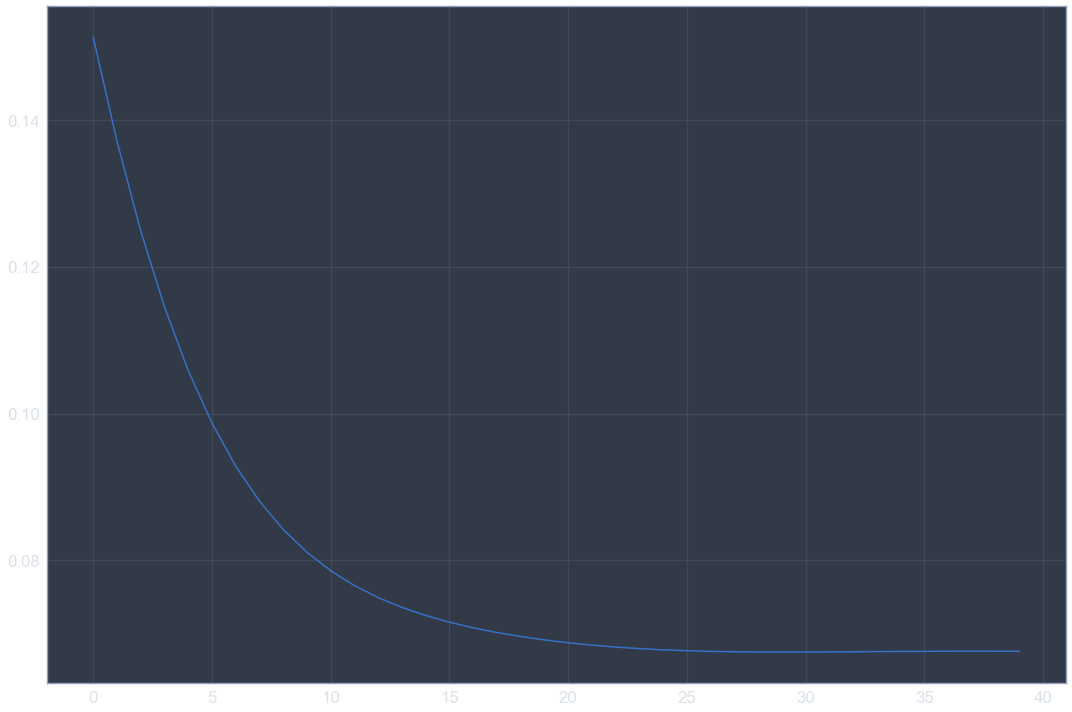

In [48]:
plot(loss_list)